# Readability indices

# Cognitive Load Simulation

Cognitive load is the resources your working memory has to use during problem solving and learning activities.

Total cognitive load = intrinsic cognitive load + extrinsic cognitive load + germane cognitive load

Intrinsic cognitive load = cognitive load associated with a topic
Extrinsic cognitive load = cognitive load caused by the way a topic is presented to the learner
Germane cognitive load   = cognitive load involved in fitting new information into schema in long-term memory

Extrinsic and germane cognitive load can be reduced with intelligent instructional design. 

## Objective: Simulate the cognitive load experienced by a student with a set of prior known concepts while reading a document and compare with readability indices



In [49]:
import nltk
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

filename = 'starwiki'

concepts = {}
import pickle
# Loading extracted concepts from file (see concept_extraction.ipynb)
#concepts = {'sents':sents,'rawtxt':rawtxt,'sent_to_npflat':sent_to_npflat,'sent_to_tags':sent_to_tags,'sent_to_ltags':sent_to_ltags,'np_to_sent':np_to_sent,'Conceptdata':Conceptdata}
with open(filename +'concepts.pickle', 'rb') as f:
    concepts = pickle.load(f)

# Loading idf dictionary (see Build_IDF_dictionary.ipynb)
with open('idf_dict.pickle','rb') as f1:
    idf_dict =pickle.load(f1)

sents = concepts['sents']
rawtxt = concepts['rawtxt']
sent_to_npflat = concepts['sent_to_npflat']
sent_to_tags= concepts['sent_to_tags']
sent_to_ltags = concepts['sent_to_ltags']
np_to_sent = concepts['np_to_sent']
Conceptdata = concepts['Conceptdata']

import math



def get_idf(wrd,totaldocs=10788):
    wrd = wrd.lower()
    return idf_dict.get(wrd,math.log(totaldocs))


In [50]:
def calc_cl_per_sentence(sent_to_npflat,maxidf=9.1):
    sent_to_clt = []
    for i in range(len(sent_to_npflat)):
        npinsent = sent_to_npflat[i]
        clt= 0
        for np in npinsent:
            tokens = np.split(' ')
            idf = 0
            for t in tokens:
                if t not in stop_words:
                    idf = idf + get_idf(t)/len(tokens)
            if (idf>=maxidf):
                clt = clt + 1
        sent_to_clt.append(clt)
    return sent_to_clt

def plot_clt():
    
    from matplotlib import pyplot as plt
    plt.xlabel('document sentence #')
    plt.ylabel('Load added to working memory by sentence')
    plt.title('Cognitive Load for '+filename)
    plt.plot(list(range(1,len(sent_to_npflat)+1)),calc_cl_per_sentence(sent_to_npflat),drawstyle='steps')
    plt.savefig('cltfig1.png')
    return None

Mininum cognitive load sentence:   The nearest star to Earth is the Sun
Maximum cognitive load sentence:   In 1584, Giordano Bruno suggested that the stars were like the Sun, and may have other planets, possibly even Earth-like, in orbit around them,[24] an idea that had been suggested earlier by the ancient Greek philosophers, Democritus and Epicurus,[25] and by medieval Islamic cosmologists[26] such as Fakhr al-Din al-Razi


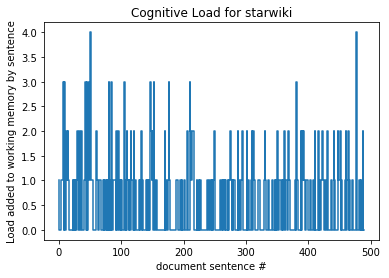

In [51]:
sent_to_clt = calc_cl_per_sentence(sent_to_npflat)
print('Mininum cognitive load sentence: ',sents[sent_to_clt.index(min(sent_to_clt))])
print('Maximum cognitive load sentence: ',sents[sent_to_clt.index(max(sent_to_clt))])
plot_clt()

## Readability indices

Readability is the ease with which a reader can understand a text, and is calculated through a number of different empirical equations. 

1. Flesch–Kincaid readability tests
New reading ease score = 1.599nosw − 1.015sl − 31.517
Where: nosw = number of one-syllable words per 100 words and
sl = average sentence length in words.


In [52]:
from nltk.corpus import cmudict
cmud = cmudict.dict()
def manual_syllable_count(phrase):
    vowels = {'a','e','i','o','u'}
    consonants = {'b','c','d','f','g','h','j','k','l','m','n','p','q','r','s','t','v','w','x','z'}
    y = {'y'}
    length = len(phrase)
    count_s = 0
    # syllables are counted in middle and end from the starting consonant or y sound with vowel sound following
    # in the starting: vowel sounds from a,e,i,o,u,and y are counted as 1 syllable regardless
    # in the end: consonant - vowel end with e is not counted, every other case including y as the vowel is counted
    first = phrase[0]
    #print(first)
    # dividing middle portion of word into pairs
    pairs = [phrase[i:i+2] for i in range(len(phrase)-2)]
    # getting ending pair
    end = phrase[len(phrase)-2:len(phrase)]
    
    if first in vowels|y:
        count_s = count_s + 1
        #print(first,count_s)
        
    for p in pairs:
        if p[0] in consonants|y and p[1] in vowels|y:
            count_s = count_s + 1
        #print(p,count_s)
    #print(end)
    if end[0] in consonants|y and end[1] in {'a','i','o','u','y'}:
        count_s = count_s + 1
        #print(end,count_s)
    return count_s
#     'employee'
#     'e'   :1
#     'em'  :0
#     'mp'  :0
#     'pl'  :0
#     'lo'  :1
#     'oy'  :0
#     'ye'  :1
#     'ee'  :0
    # getting first letter

def syllable_count(phrase):
    toks = nltk.word_tokenize(phrase)
    count = 0
    for t in toks:
        #syll_list = list(chain.from_iterable(cmud.get(t,[[0]])))
        syll_list = cmud.get(t,[[0]])[0] # randomly choosing the first pronunciation
        #print(syll_list)
        if syll_list==[0]:
            count = count + manual_syllable_count(t)
        else:
            count = count + sum([1 for y in syll_list if y[-1].isdigit()])
    return count


In [53]:
print(syllable_count('rhythm'))

2
